<span style="font-size:24pt; color:blue; font-family: 'Times New Roman'">Notebook:: 
    <span style="color:green;"> Race Car Plots FACTS `NJ STAP report` </span>
</span>
<!-- <br>
<span style="font-size:12pt; color:black; font-family:Georgia, serif;font-style:italic">by Praveen Kumar </span>
<br> -->

<p style="background-color: black;"> . </p>

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import datetime
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

print('import py modules ... ')

import py modules ... 


<p style="background-color: blue;"> . </p>

<span style="font-size:24pt; color:blue; font-family: 'Times New Roman'">PLOT:: 
    <span style="color:green;"> race-car-plot </span>
</span>

In [ ]:
colorsNU = {
    'med': {
        'ssp126': '#0C4077',
        'ssp245': '#F59C10',
        'ssp370': '#E4201C',
        'ssp585': '#A82113',
    },
    'low': {
        'ssp126': '#ABBFDF',
        'ssp245': '#F4C99E',
        'ssp370': '#EFABB6',
        'ssp585': '#F0877C',
    }
}

In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def plot_vertical_bars(ax, data, height, ssp, station, colors, y_max=1.5, bar_scaling=0.5, scatter_size=250, circlewidth=2, bar_width=10):
    
    y_positions = np.arange(len(ssp))

    for i, ssp_value in enumerate(ssp):

        d0_med = xr.open_dataset(data[i].replace('x0confidence_folderx0', 'medium_confidence'), engine='netcdf4')
        d0_low = xr.open_dataset(data[i].replace('x0confidence_folderx0', 'low_confidence'), engine='netcdf4')


        heights_med_idx = np.where(d0_med['heights'].values == height)[0]
        heights_low_idx = np.where(d0_low['heights'].values == height)[0]
        
        YoE_med = d0_med['exceedance_years'].values
        YoE_low = d0_low['exceedance_years'].values
        
        qvals_med = (d0_med['quantiles'].values * 100)
        qidx_med = {q: np.where(qvals_med == q)[0][0] for q in [17, 50, 83]}
        p17_med, p50_med, p83_med = [YoE_med[qidx_med[q], heights_med_idx, station] for q in [17, 50, 83]]

        qvals_low = (d0_low['quantiles'].values * 100)
        qidx_low = {q: np.where(qvals_low == q)[0][0] for q in [5, 17, 50, 83, 95]}
        p05_low, p17_low, p50_low, p83_low, p95_low = [YoE_low[qidx_low[q], heights_low_idx, station] for q in [5,17, 50, 83,95]]


        # position for the bar
        bar_y = y_positions[i]
        
        # Plot bar and scatter for the median
        ax.hlines(bar_y, p05_low, p95_low, color=colors['low'][ssp_value], linewidth=bar_width*.5,alpha=0.5)
        ax.hlines(bar_y, p17_low, p83_low, color=colors['low'][ssp_value], linewidth=bar_width,alpha=0.5)
        ax.hlines(bar_y, p17_med, p83_med, color=colors['med'][ssp_value], linewidth=bar_width,alpha=1.0)    
        ax.scatter(p50_med, bar_y, facecolors='none', edgecolors='black',
           s=scatter_size, linewidths=circlewidth, zorder=5, label=f'Median {ssp_value}')
        

    # Axis
    ax.set_xticks(np.arange(2000, 2301, 50))
    ax.set_xlim(2020, 2300)
    [label.set(fontsize=10, fontweight='bold') for label in ax.get_xticklabels()]
    ax.set_yticks(y_positions)
    ax.set_yticklabels(["SSP1-2.6","SSP2-4.5","SSP3-7.0","SSP5-8.5"], fontsize=10, fontweight='bold')
    ax.grid(True, linestyle="--", alpha=0.6,axis="x")
    stations = ["PHILADELPHIA", "CAPE_MAY", "ATLANTIC_CITY", "SANDY_HOOK", "New_York"]
    ax.text(0.63, 1.05, stations[station], transform=ax.transAxes, fontsize=8, color="red", ha="right")
    ax.text(0.65, 1.05, f'exceedance height={round(height/304.8)} FT ({height}mm)', transform=ax.transAxes, fontsize=8, color="blue", ha="left")
    # Thickness of plot Border
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    # add padding above and below the bars on the y-axis
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.5, ymax + 0.5)

    
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++    
def plot_Racecar(ssp,locations, height,color,scatter_size=350, circlewidth=2, bar_width=12):
    confidence_folder= "medium_confidence"
    path1="......../4_confidence_level_files_xcdance"
    value='xcdance'
    #
    
    ## Confidence Level ------>
    data0=f"{path1}/x0confidence_folderx0/ssp119/total_ssp119_x0confidence_folderx0_{value}.nc"
    data1=f"{path1}/x0confidence_folderx0/ssp126/total_ssp126_x0confidence_folderx0_{value}.nc"
    data2=f"{path1}/x0confidence_folderx0/ssp245/total_ssp245_x0confidence_folderx0_{value}.nc"
    data3=f"{path1}/x0confidence_folderx0/ssp370/total_ssp370_x0confidence_folderx0_{value}.nc"
    data4=f"{path1}/x0confidence_folderx0/ssp585/total_ssp585_x0confidence_folderx0_{value}.nc"
    
    
    # d=[data0,data1,data2,data3,data4]
    d=[data1,data2,data3,data4]
    
    #==> Figure 
    fig, ax_bars = plt.subplots(1, 1, figsize=(8, 3))
    #
    plot_vertical_bars( ax=ax_bars, data=d, height=height, ssp=ssp, station=locations, 
                           colors=color, y_max=1.5, bar_scaling=0.4, scatter_size=scatter_size, circlewidth=circlewidth, bar_width=bar_width)

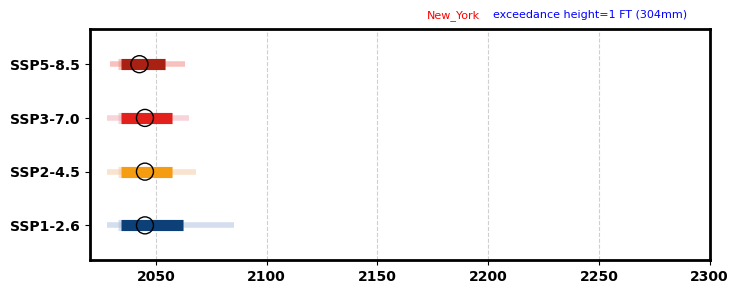

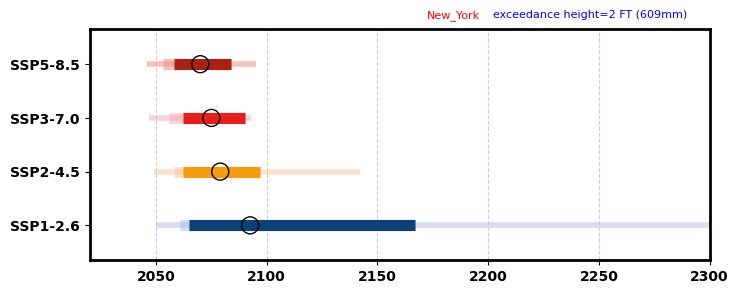

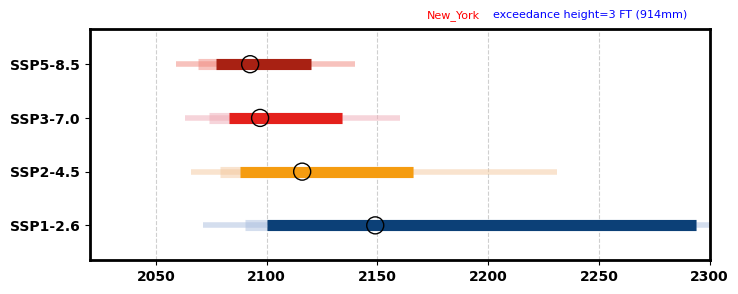

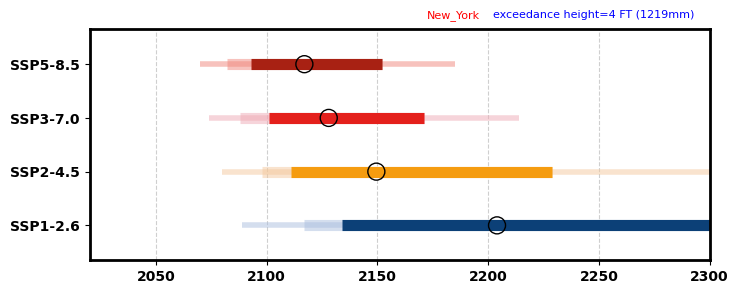

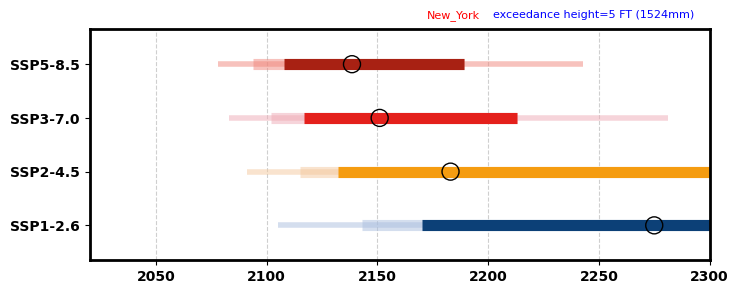

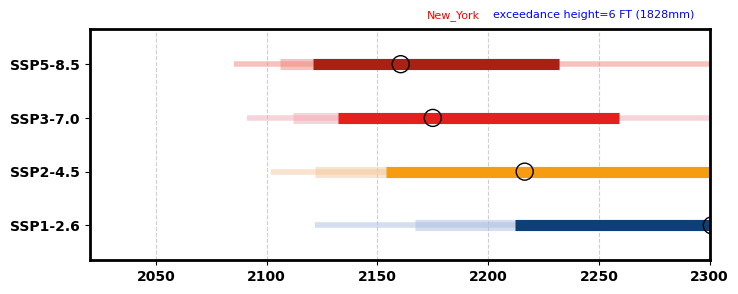

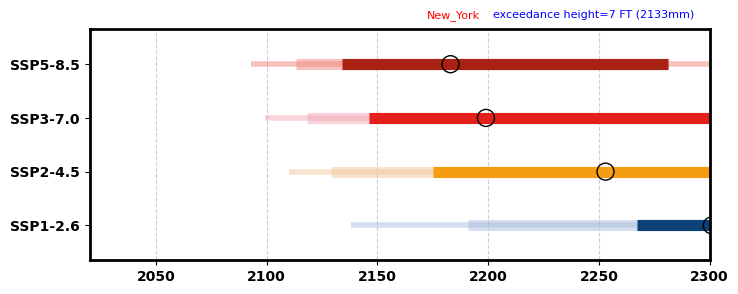

In [ ]:
ssp = ['ssp126', 'ssp245', 'ssp370', 'ssp585']
height =[ 304,  609,  914, 1219, 1524, 1828, 2133]  #mm
# Locations=> [PHILADELPHIA, CAPE_MAY, ATLANTIC_CITY, SANDY_HOOK, New_York]

for ht in height:
    plot_Racecar(ssp,locations = 4, height = ht, color=colorsNU,scatter_size=150, circlewidth=1, bar_width=8)

<p style="background-color: blue;"> . </p>

# Scratch

---